# Data Analysis of News and Stock Prices

First we'll import all the libraries we'll need.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go

## Reading in and Cleaning the Data Sets

Then we'll import our data sets. The dats sets are the news_dija_data set which includes the top 25 Reddit News headlines and dija_data set which includes the opening and closing of the Dow Jones stock over a period of time.

In [2]:
news_dija_data = pd.read_csv('combined_stock_data.csv')
djia_data = pd.read_csv('upload_DJIA_table.csv')

Next, we'll clean up our news_dija_data set. There may be some rows that are null and some that aren't strings so we have to conver them. Also, the data set comes with the letter 'b' at the beginning of every healine so we have to remove that.

In [3]:
# clean null rows
news_dija_data = news_dija_data.dropna()

# convert all rows to strings
news_dija_data = news_dija_data.apply(lambda x: x.map(lambda y: str(y)), axis=1) 

# remove b characters
news_dija_data = news_dija_data.apply(lambda x: x.map(lambda y: y.replace('b"', '').replace
                                                      ("b'", '').replace('"', '')), axis=1)

## Combining the Data Sets

We now will merge our news_dija_data and our dija_data sets so that we only have to work with one data set for easy analysis. We chose various columns from news_dija_data to push to the end of dija_data.

In [4]:
combined_df = news_dija_data[['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']].merge(
    djia_data, how='inner', on='Date', left_index=True)

In [5]:
columns = list(combined_df)
columns.append(columns.pop(columns.index('Label')))
combined_df = combined_df.loc[:, columns]
combined_df.head()

,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
1988,2008-08-08,75.0,25.0,18.75,56.25,25.0,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0
1987,2008-08-11,83.3333333333,16.6666666667,41.6666666667,41.6666666667,16.6666666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1
1986,2008-08-12,56.25,43.75,18.75,37.5,43.75,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0
1985,2008-08-13,38.4615384615,61.5384615385,15.3846153846,23.0769230769,61.5384615385,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0
1984,2008-08-14,45.4545454545,54.5454545455,36.3636363636,9.090909090910001,54.5454545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1


Since some of the rows are still not float types we will now convert them to float types and then sort the data frame by index.

In [6]:
combined_df['Volume'] = combined_df['Volume'].astype(float)
combined_df['Subjectivity'] = combined_df['Subjectivity'].astype(float)
combined_df['Objectivity'] = combined_df['Objectivity'].astype(float)
combined_df['Positive'] = combined_df['Positive'].astype(float)
combined_df['Negative'] = combined_df['Negative'].astype(float)
combined_df['Neutral'] = combined_df['Neutral'].astype(float)
combined_df['Label'] = combined_df['Label'].astype(float)

combined_df.index = combined_df.index.sort_values()
combined_df.head()

,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
0,2008-08-08,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312,0.0
1,2008-08-11,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609,1.0
2,2008-08-12,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,0.0
3,2008-08-13,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,0.0
4,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,1.0


## Analyzing the Data Sets

We will now check the described statistics of the columns of the combined dataframes in order to check for any outliers.

In [7]:
print(combined_df.describe())

       Subjectivity  Objectivity     Positive     Negative      Neutral  \
count   1986.000000  1986.000000  1986.000000  1986.000000  1986.000000   
mean      56.712522    43.287478    19.966718    36.745804    43.287478   
std       21.557927    21.557927    16.373424    21.109970    21.557927   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%       40.000000    28.571429     8.333333    21.859903    28.571429   
50%       54.545455    45.454545    18.181818    33.333333    45.454545   
75%       71.428571    60.000000    28.571429    50.000000    60.000000   
max      100.000000   100.000000   100.000000   100.000000   100.000000   

               Open          High           Low         Close        Volume  \
count   1986.000000   1986.000000   1986.000000   1986.000000  1.986000e+03   
mean   13463.058741  13545.271995  13376.772929  13466.899126  1.628337e+08   
std     3143.678855   3136.644307   3150.903434   3144.468618  9.395177e+07   
min     

From this description of all the columns we now know how the numbers work out as a whole.

The histograms that are plotted below show the frequency of the values of all columns within the data set. The x of this these charts are the value of what its describing and the y is the frequency of that value.

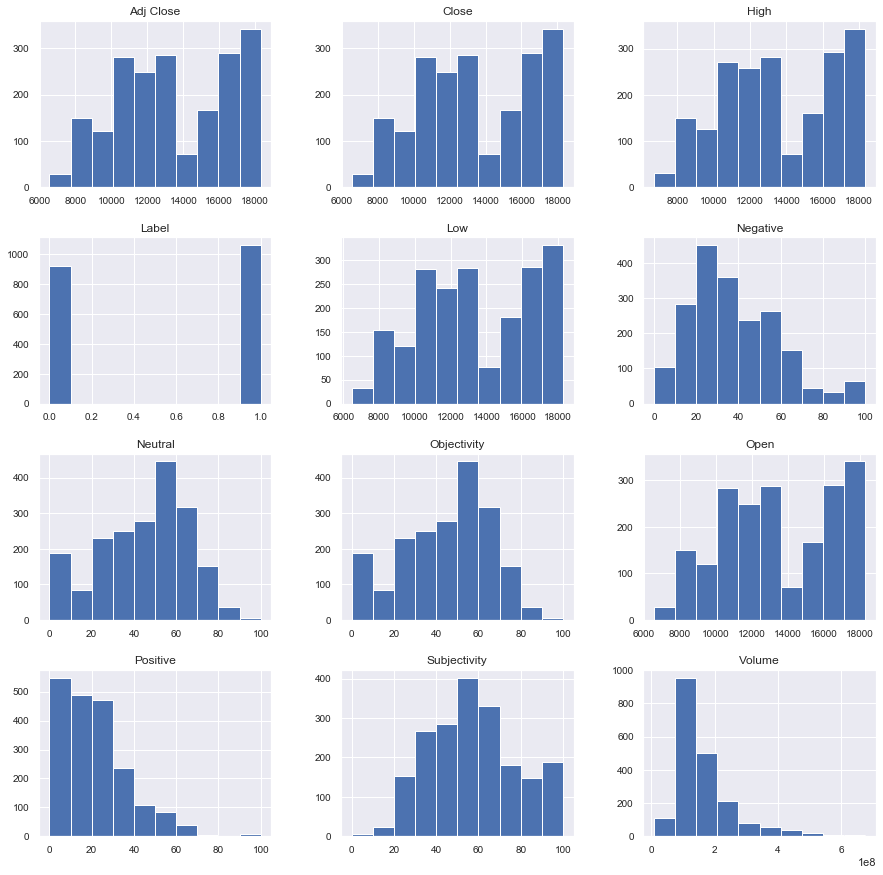

In [8]:
sns.set()
combined_df.hist(sharex = False, sharey = False, xlabelsize = 10, ylabelsize = 10, figsize=(15, 15))
pyplot.show()

There's not much to conclude from this data set. We can see from the label chart that the Dow Jones stock is more likely to be up rather than down. Also, the news headlines are more likely to have a neutral sentiment, and that the news heaslines are skewed more left for positivity than negativity implying that negative headlines us more frequent. The news headline's objectivity is more left skewed and subjectivity is more right skewed, however they are mostly in the middle.

In these scatterplots a 0 represents the stock price going down and a 1 represents the stock price going up.

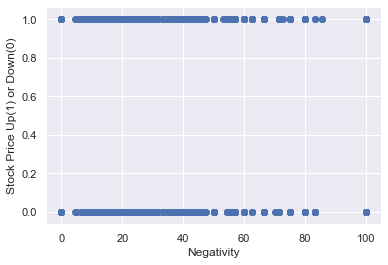

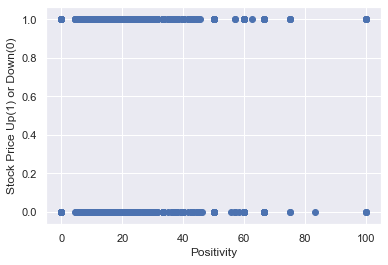

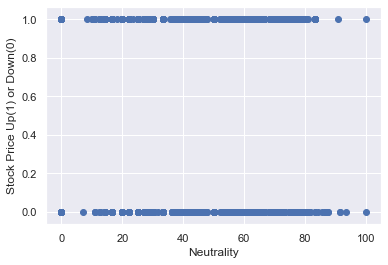

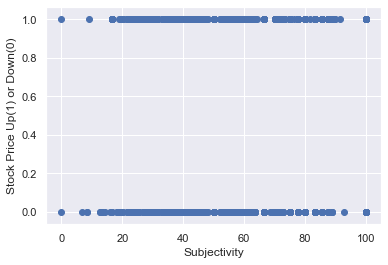

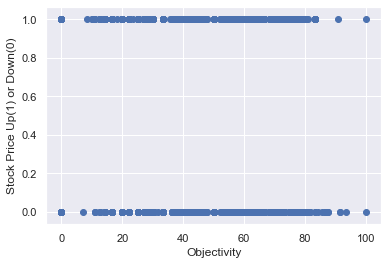

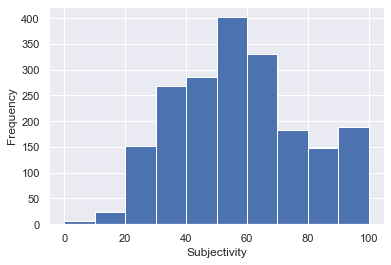

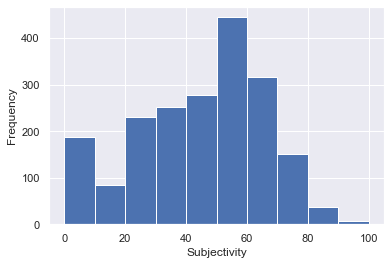

Size of the Labels column
Label
0.0     924
1.0    1062
dtype: int64


In [9]:
pyplot.scatter(combined_df['Negative'], combined_df['Label'])
pyplot.ylabel('Stock Price Up(1) or Down(0)')
pyplot.xlabel('Negativity')
pyplot.show()

pyplot.scatter(combined_df['Positive'], combined_df['Label'])
pyplot.ylabel('Stock Price Up(1) or Down(0)')
pyplot.xlabel('Positivity')
pyplot.show()

pyplot.scatter(combined_df['Neutral'], combined_df['Label'])
pyplot.ylabel('Stock Price Up(1) or Down(0)')
pyplot.xlabel('Neutrality')
pyplot.show()

pyplot.scatter(combined_df['Subjectivity'], combined_df['Label'])
pyplot.ylabel('Stock Price Up(1) or Down(0)')
pyplot.xlabel('Subjectivity')
pyplot.show()

pyplot.scatter(combined_df['Objectivity'], combined_df['Label'])
pyplot.ylabel('Stock Price Up(1) or Down(0)')
pyplot.xlabel('Objectivity')
pyplot.show()

combined_df['Subjectivity'].plot(kind='hist')
pyplot.ylabel('Frequency')
pyplot.xlabel('Subjectivity')
pyplot.show()

combined_df['Objectivity'].plot(kind='hist')
pyplot.ylabel('Frequency')
pyplot.xlabel('Subjectivity')
pyplot.show()

print("Size of the Labels column")
print(combined_df.groupby('Label').size())

It's also very difficult to dissect data from these graphs since there are only slight differences. We can see that there are noticeable differences between the stock price being down and the news sentiment being positive or negative. The other variable do however have slight differences, but there are no conclusions I can get from the data.

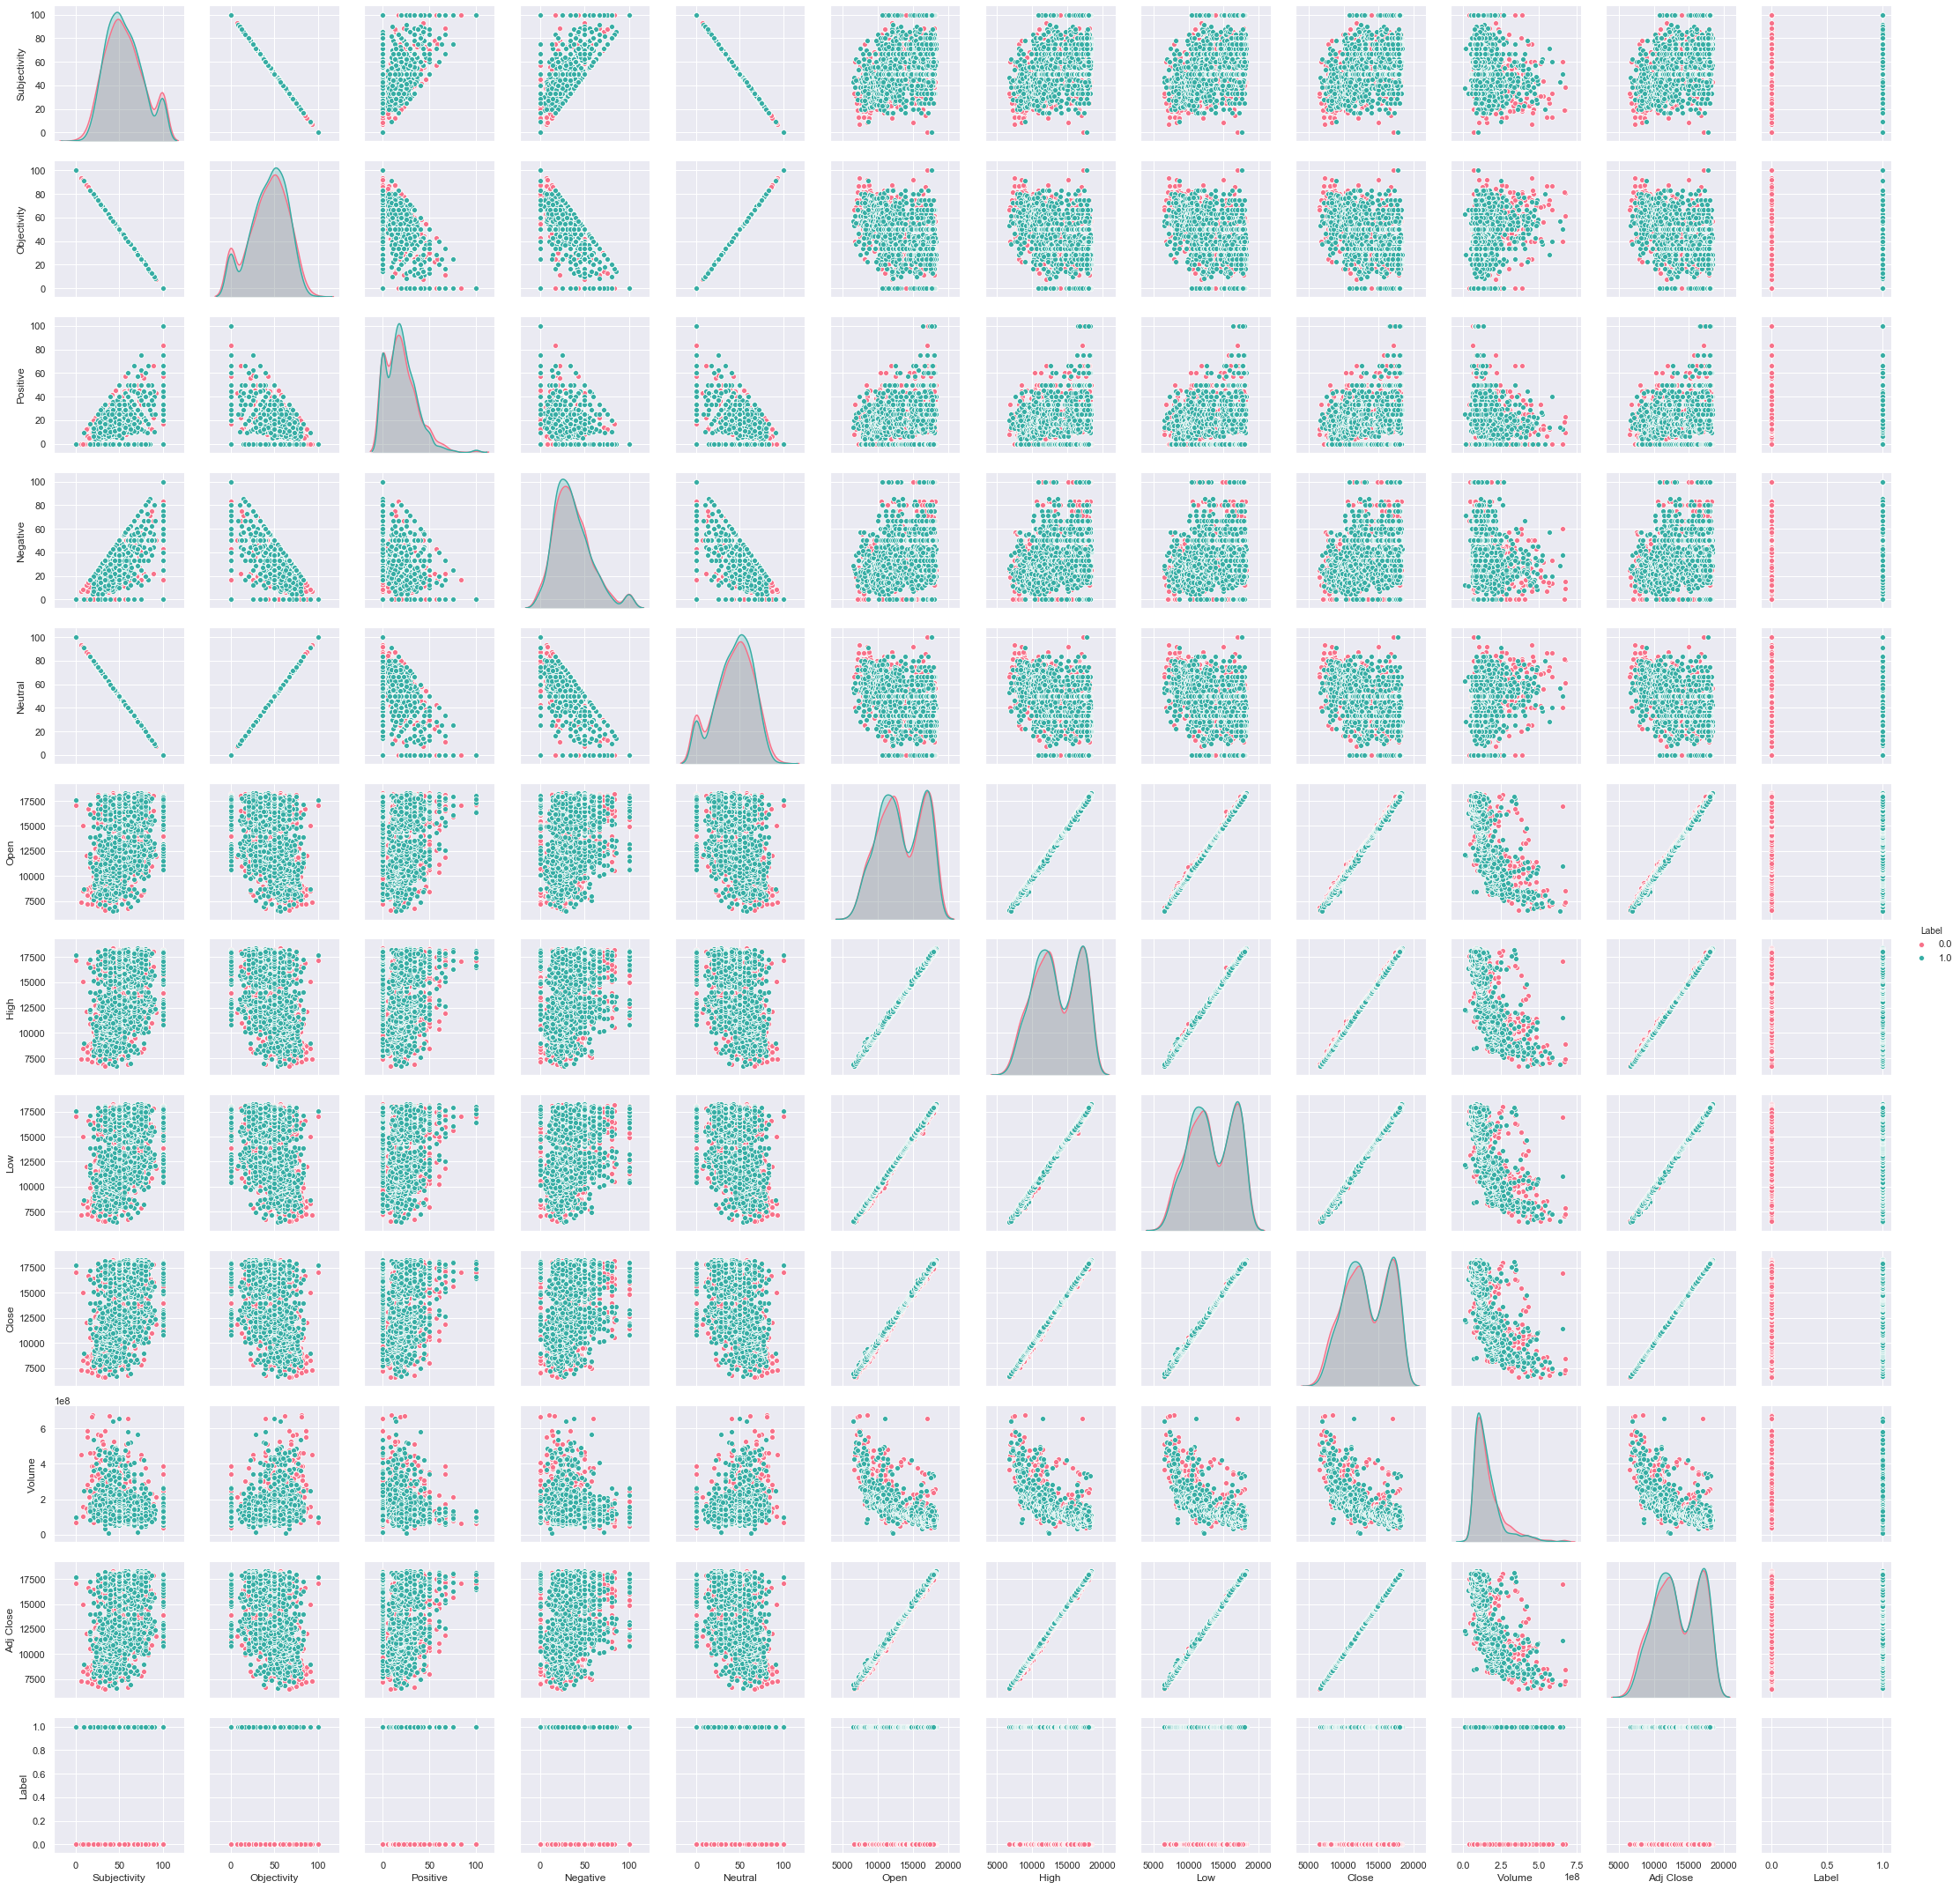

In [15]:
grid = sns.pairplot(combined_df, hue='Label', palette="husl")

grid

As we can see, the data within this pair plot is very messy. We can't get much data from this since the dots are overlaping in most of the graphs. Also, a lot of the data isn't skewed a certain direction so there aren't many conclusions I can draw from this.

In order to be able to get a better organized and dissectable look at the data I will add a regression model. This will allow us to see if there are any differences in the data points.

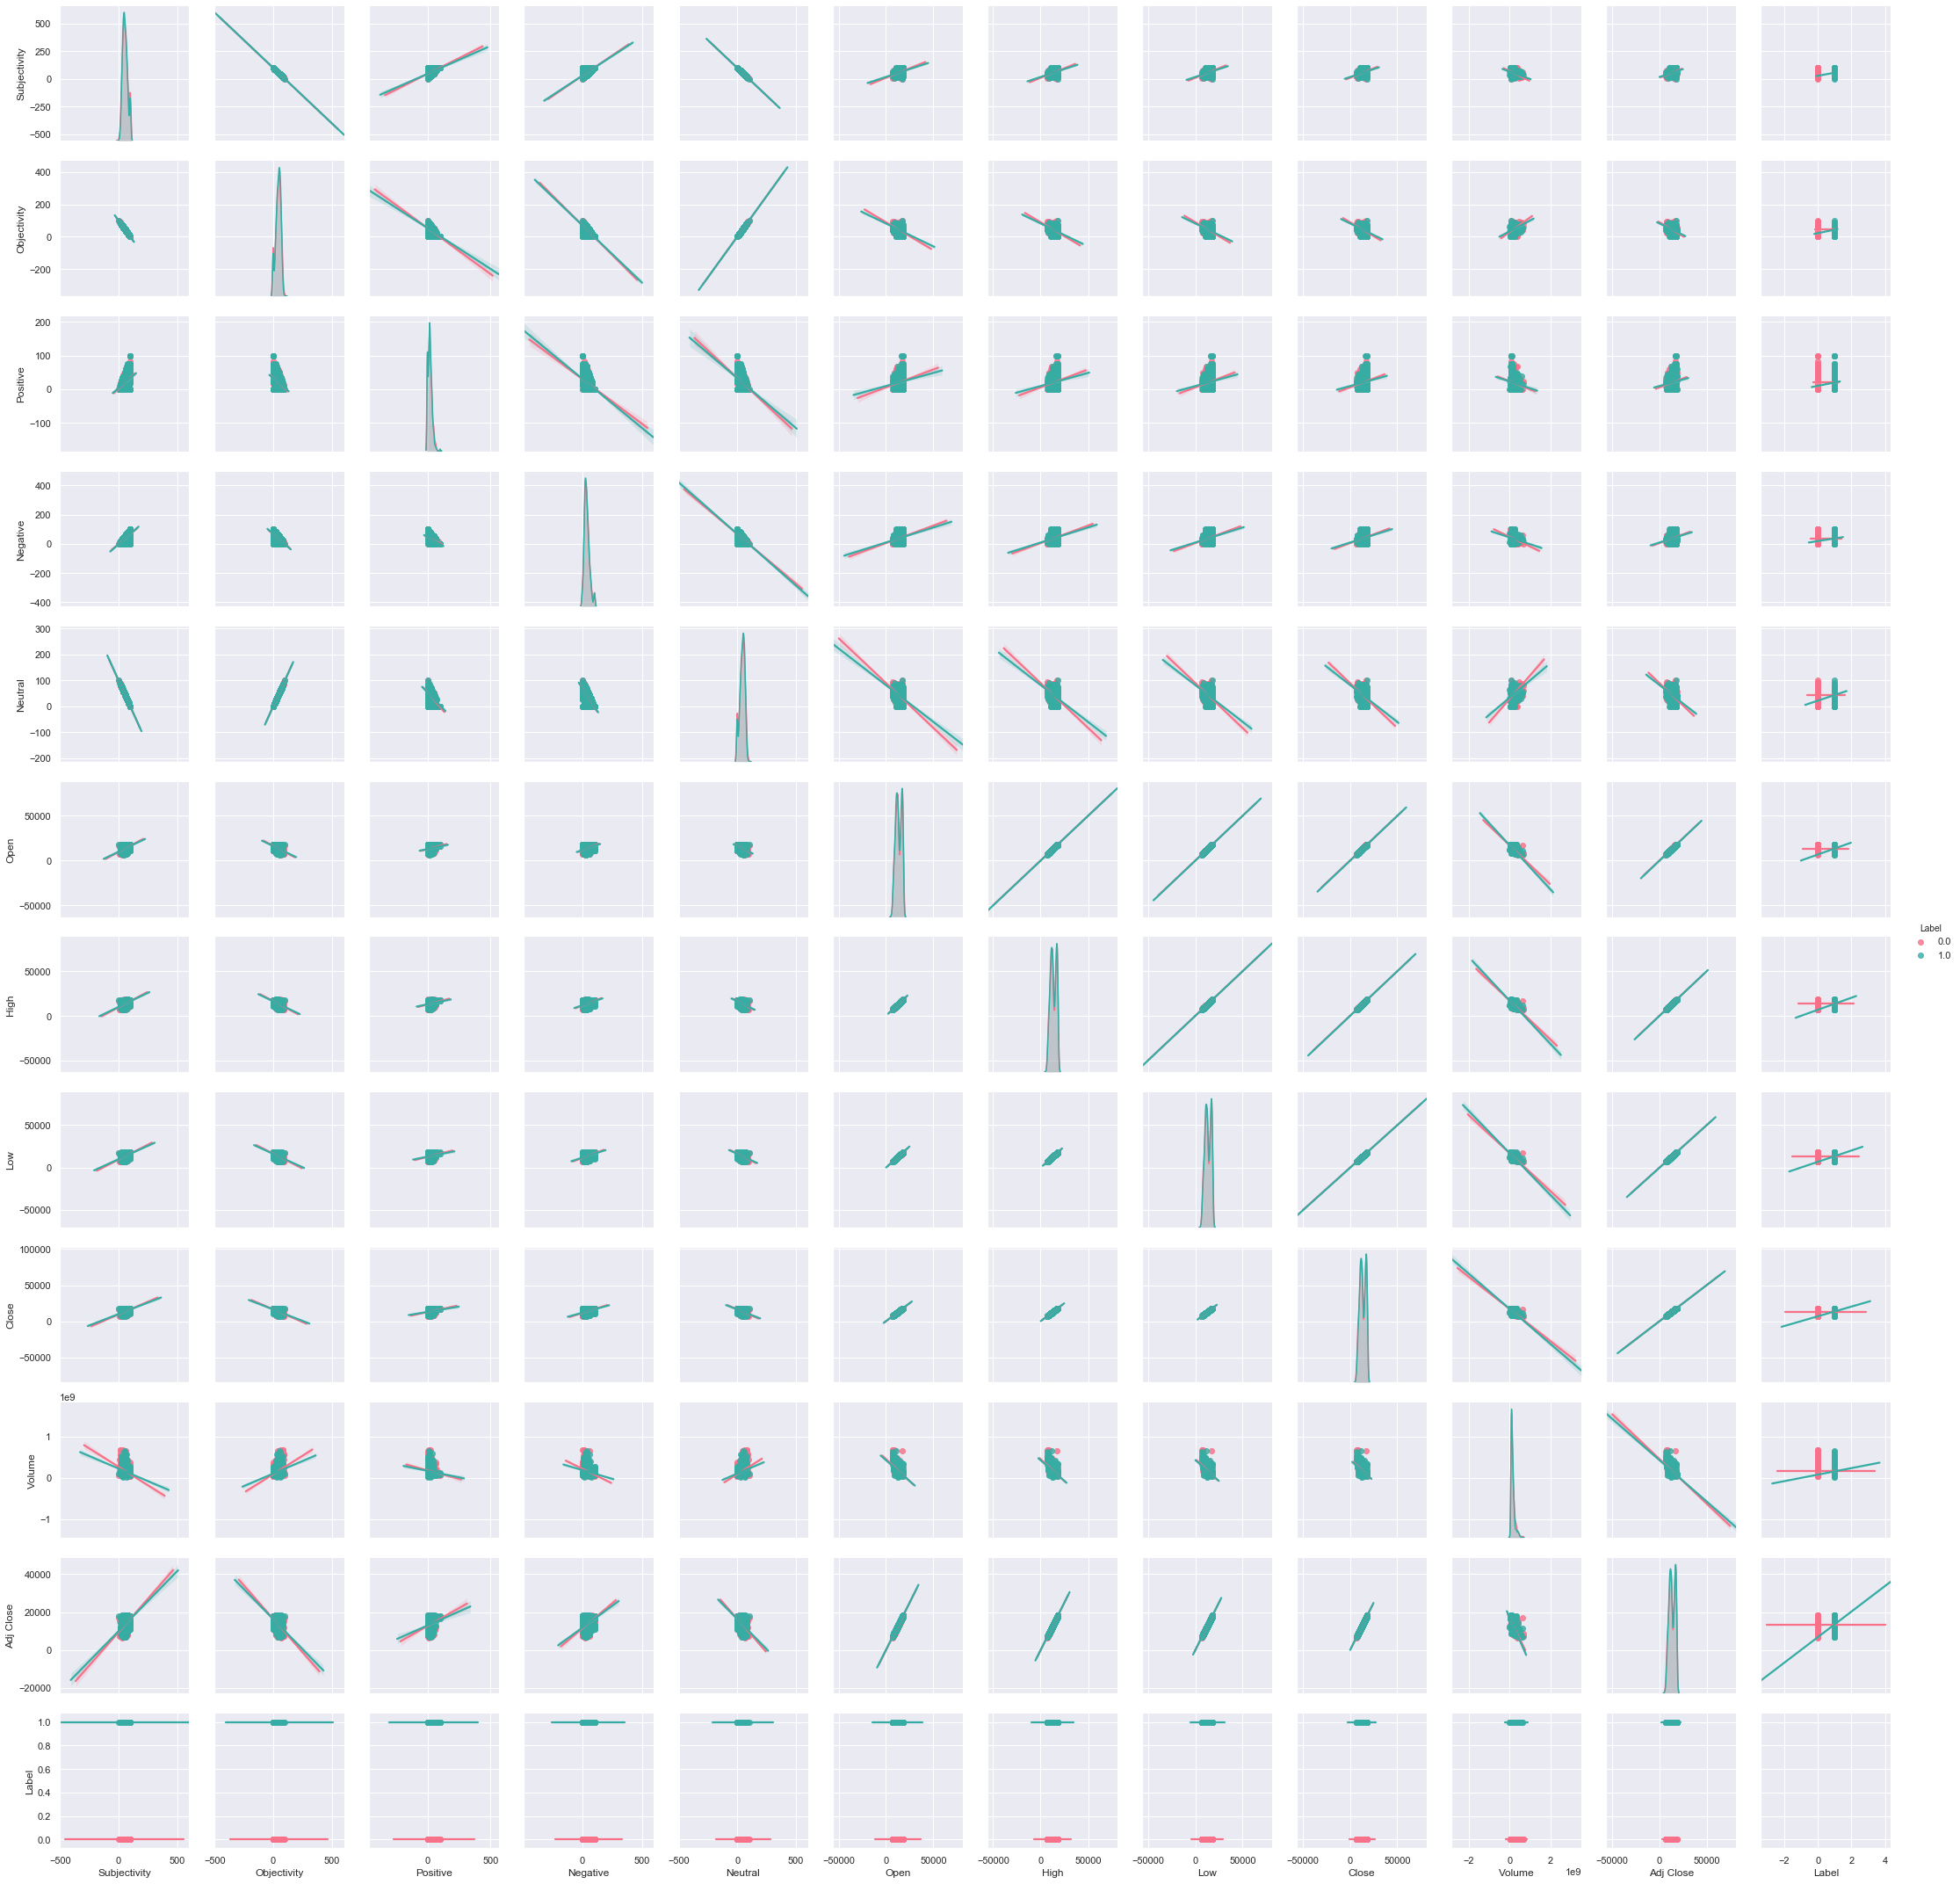

In [11]:
grid = sns.pairplot(combined_df, kind="reg", hue='Label', palette="husl")

grid

We can now see that through regression modeling that the data is a lot clearer.

Some conclusions I can make from this data about positivity and negativity:

- When there is higher positivity, the stock more likely has a down day. 
- When there is higher negativity, the stock more liekly has an down day. 

It has to be noted however that there is only a very slight difference in these charts between an up day and a down day when comparing positivity and negativity.

Some conclusions I can make from this data about subjectivity and objectivity:

- When there is higher subjectivity, the higher the open and close
- When there is higher objectivity, the lower the open and close.

I'm not too sure what to make of this conclusion since I'm not too sure what kind of headlines are contained within these categories.

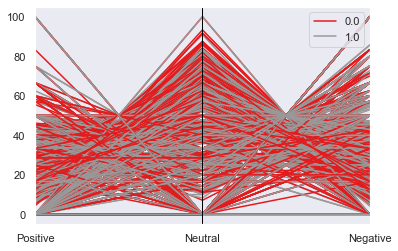

In [12]:
plt.figure()

pd.plotting.parallel_coordinates(
    combined_df[['Positive', 'Neutral', 'Negative', 'Label']], 
    'Label', colormap=plt.get_cmap("Set1"))

plt.show()

We can see from this parallel coordinates plot that when the news is neutral, it seems to be more red which means that the stock market is more liekly to be down. When the news is positive and negative the plot is very mixed between up and down days. I can however see slightly more ups in the stock market when the news is negative. This can imply a down point in the market when the price is down. At the point the stock is essentially "discounted" which means that more people will buy the stock thus leading for the stock price to got up. Whereas when the stock is up more people will sell the stock in order to make profit thus leading to the stock price going down. 

## Conclusion

We can see that there is no clear correlation between the sentiment of the news healines and the prices of the stock. This may be beacuse the stock market is unpredictable and many people have different reasons for buying and selling. Some reasons I have behind this are that when there is good news a lot of people sell thinking that it's the peak, and many people buy thinking it will go up further. When there is bad news many people sell thinking it is at its peak, and many people buy thinking that it is low and will go higher. This this causes them to be indistinguishable. In order to get more accurate analysis I believe we would have to do deeper analysis.